# Assignment 6

### _Description_

The goal of this assingment was to use post-clustering techniques to validate the results we got from the FCM assignment, and to compare the post clustering results to the pre-clustering iVAT results.

### _Methods_

I chost to use the partition coefficient, classification entroy, and the CS index for post clustering. I wrote the methods from scratch, and each can be found in the code below:

```
% Assignment 5
% Taten Knight

% Cleanup
close all;
clear all;
clc;

numClusters = [4, 5, 0, 0, 3, 3, 2, 2, 2, 2, 2, 2]; % From assignment 4
datasets = LoadDataSets(); % Load all datasets
memberships = cell(length(numClusters), 1);
clusters = memberships;
% Partition Coefficient
pc = zeros(length(numClusters), 10);
pcFinal = zeros(length(numClusters), 1);
% Classification Entropy
ce = pc;
ceFinal = pcFinal;
% CS
cs = ce;
csFinal = ceFinal;
for m=1:length(numClusters)
    if numClusters(m) ~= 0
        memberships{m} = cell(10, 1);
        clusters{m} = memberships{m};
        for C=2:10
            memberships{m}{C} = readtable(['membership_dataset_' num2str(m) '_clusters_' num2str(C) '.xlsx']);
            clusters{m}{C} = readtable(['clusters_dataset_' num2str(m) '_clusters_' num2str(C) '.xlsx']); 
        end
    end
end



for setNum=1:length(numClusters)
    if numClusters(setNum) ~= 0
        % Input Data
        for C = 2:10
            testSet = datasets{setNum};
            testMemb = memberships{setNum}{C}{:, :};
            testClust = clusters{setNum}{C}{:, :};
            dims = size(testSet);
            n = dims(1); % Number of datapoints
            d = dims(2); % Dimensions of data
            
            % PC
            membershipSquared = testMemb .* testMemb;
            membershipSquaredSummed = sum(sum(membershipSquared));
            pcVal = membershipSquaredSummed / numel(membershipSquared);
            pc(setNum, C) = pcVal;
            
            % CE
            membLogged = testMemb .* log(testMemb);
            membLoggedSummed = sum(sum(membLogged));
            ceVal = membLoggedSummed / numel(membLogged);
            ce(setNum, C) = -1 * ceVal;
            
            % CS
            numSum = 0;
            denSum = 0;
            clusterDistances = sqrt(pdist2(testClust, testClust));
            for c = 1:C
                clusterElements = testSet(testMemb(c, :) > .5, :);
                distances = sqrt(pdist2(clusterElements, clusterElements));
                scatterSum = 0;
                for j = 1:numel(clusterElements(:, 1))
                    maxScatter = max(distances(j, :));
                    scatterSum = scatterSum + maxScatter;
                end
                scatterSum = scatterSum / length(clusterElements(:, 1));
                numSum = numSum + scatterSum;
                for cden = 1:C
                    clusterDistance = clusterDistances(c, :);
                    clusterDistance(c) = [];
                    minClusterDistance = min(clusterDistance);
                    denSum = denSum + minClusterDistance;
                end
            end
            cs(setNum, C) = numSum / denSum;
            
        end
    end
    tempPc = pc(:, 2:end);
    [holder1, pcI] = min(tempPc(setNum, :));
    pcFinal(setNum) = pcI + 1;
    
    tempCe = ce(:, 2:end);
    [holder2, ceI] = min(tempCe(setNum, :));
    ceFinal(setNum) = ceI + 1;
    
    tempCs = cs(:, 2:end);
    [holder3, csI] = min(tempCs(setNum, :));
    csFinal(setNum) = csI + 1;
end

fig = figure();
heat0 = heatmap(cs);
title('CS');
heat0.GridVisible = 'off';
colormap('jet');
heat0.XDisplayLabels = nan(size(heat0.XDisplayData));
heat0.YDisplayLabels = nan(size(heat0.YDisplayData));
saveas(fig, 'cs.png');

fig = figure();
heat1 = heatmap(pc);
title('pc');
heat0.GridVisible = 'off';
colormap('jet');
heat1.XDisplayLabels = nan(size(heat1.XDisplayData));
heat1.YDisplayLabels = nan(size(heat1.YDisplayData));
saveas(fig, 'pc.png');

fig = figure();
heat2 = heatmap(ce);
title('CE');
heat2.GridVisible = 'off';
colormap('jet');
heat2.XDisplayLabels = nan(size(heat2.XDisplayData));
heat2.YDisplayLabels = nan(size(heat2.YDisplayData));
saveas(fig, 'ce.png');
```

### _Results_

The final results that I yielded were not as expected when taking into consideration the iVAT results, and some intuition from the scatter plots of the point. I carefully checked through my code, and am not sure where the discrepancy is between it and the expected algorithm. I also used this [paper](https://cedric.cnam.fr/fichiers/art_1877.pdf) as a reference. I am still unsure if there is an issue in my code, or the correct results are unintuitive (I believe it to be the former). The results show that for all three methods I chose (PC, CE, and CS), the methods favor the most clusters. In order to visualize the methods results, I created the following charts: 

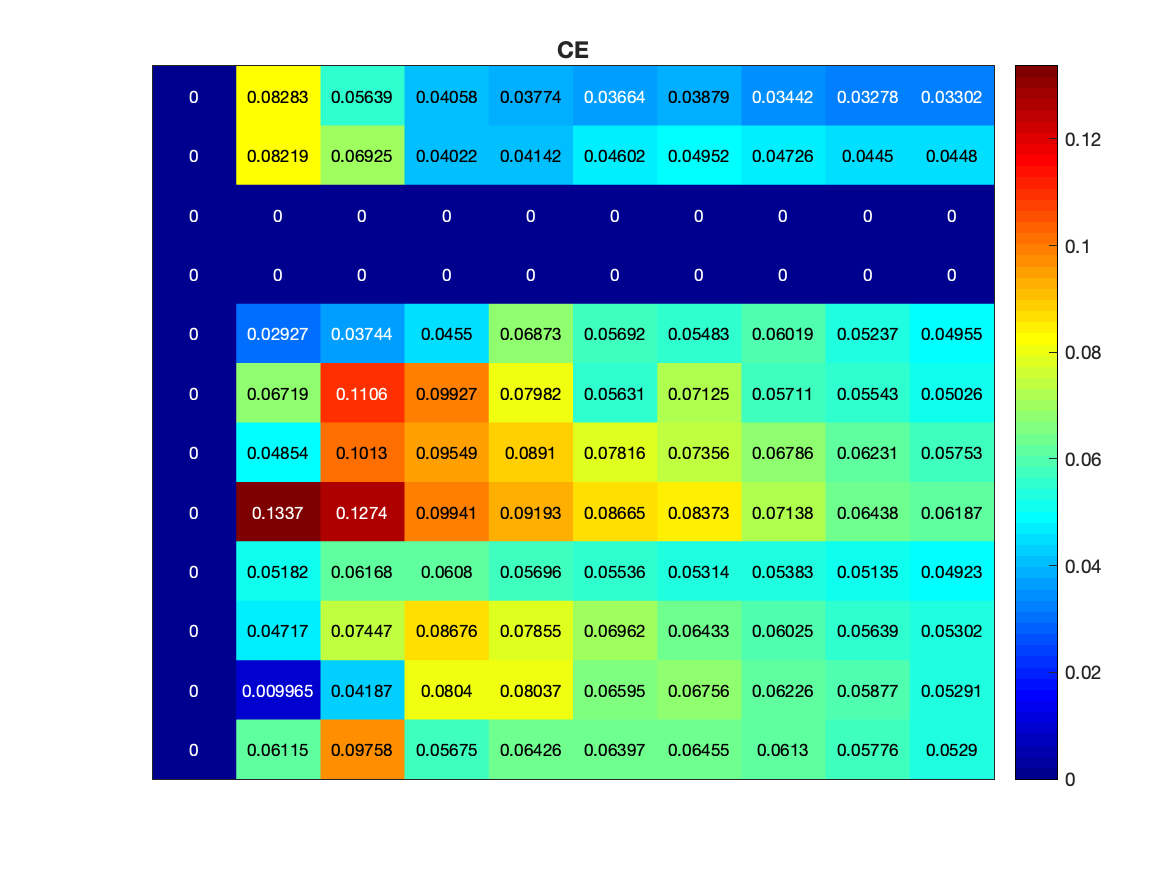

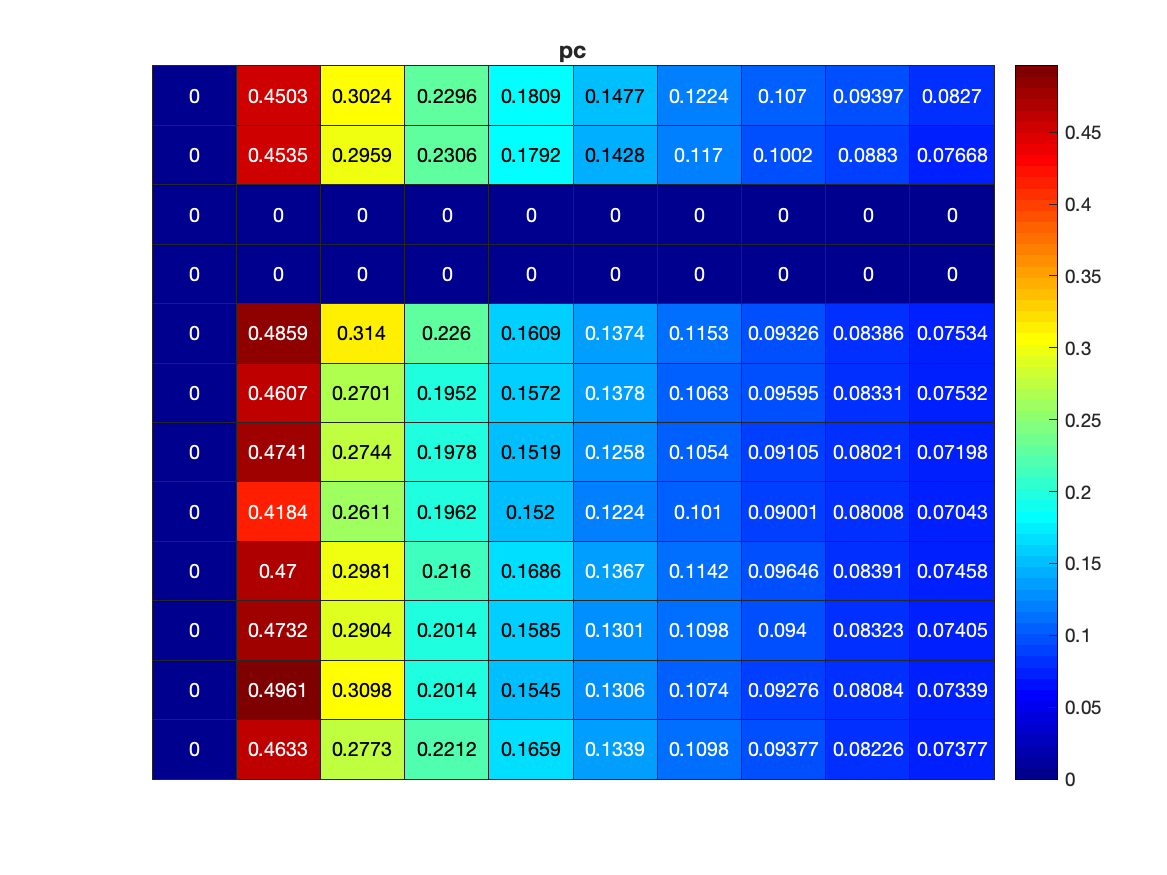

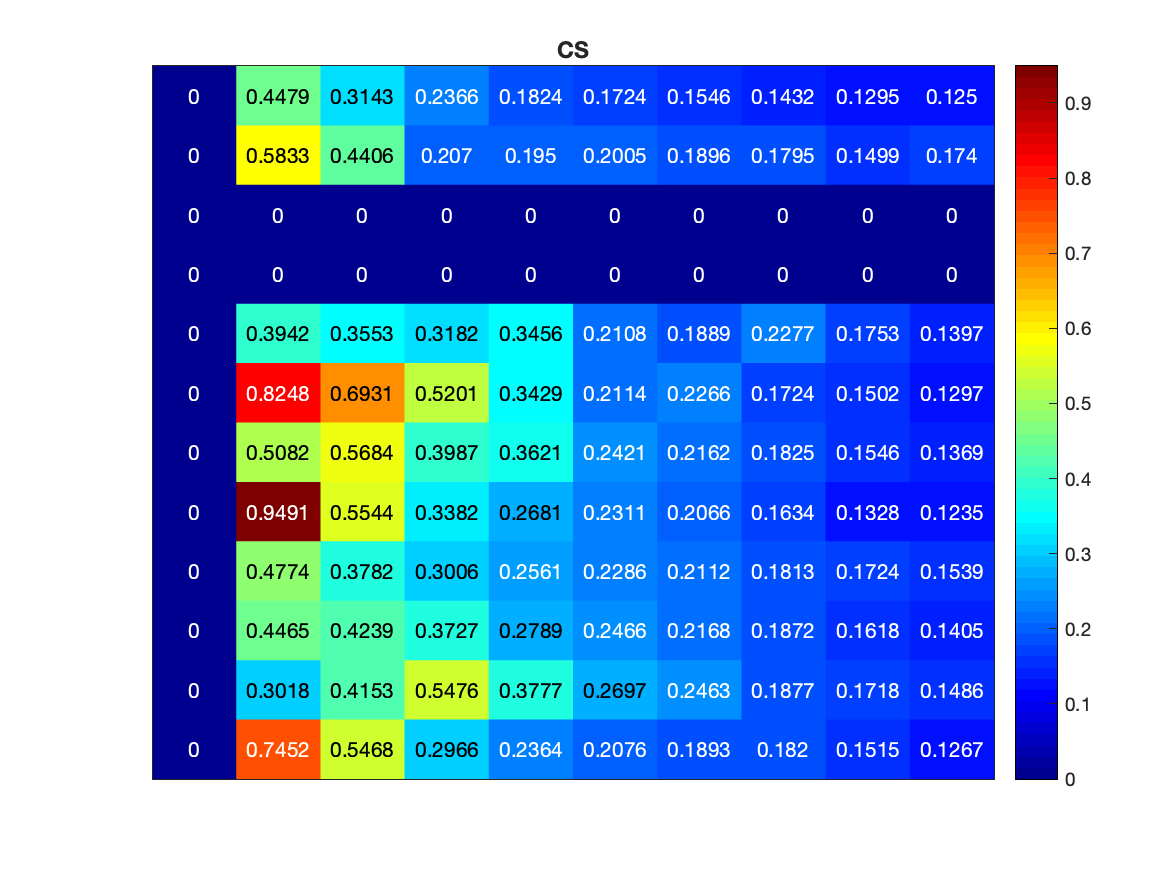

In [13]:
from IPython.display import Image, display
import os
os.chdir(path='/Users/tatenknight/school/unsupervised_ml/week6')
display(Image(filename='../week5/ce.png'))
display(Image(filename='../week5/pc.png'))
display(Image(filename='../week5/cs.png'))


For each of the heatmaps above, the lower values (or darkest blue values) are those that the algorithms indicate are the best for the datasets. I chose to ignore the single cluster case, and datasets 3 and 4 did not yield viable results for iVAT, and so have not been analyzed since then. The CS results indicate that a higher number of clusters is preferable to a lower number, and indicate that 9 or 10 clusters is the optimal choice for each case. _Please note that there is likely an error somewhere in my CS code_. The same tendency is evident in the PC chart. The CE method does not have perfect results, but does indicate that for dataset 11, two clusters is the optimum number. Comparing this to the iVAT results and the scatter plot, we see that this is a very reasonable answer:

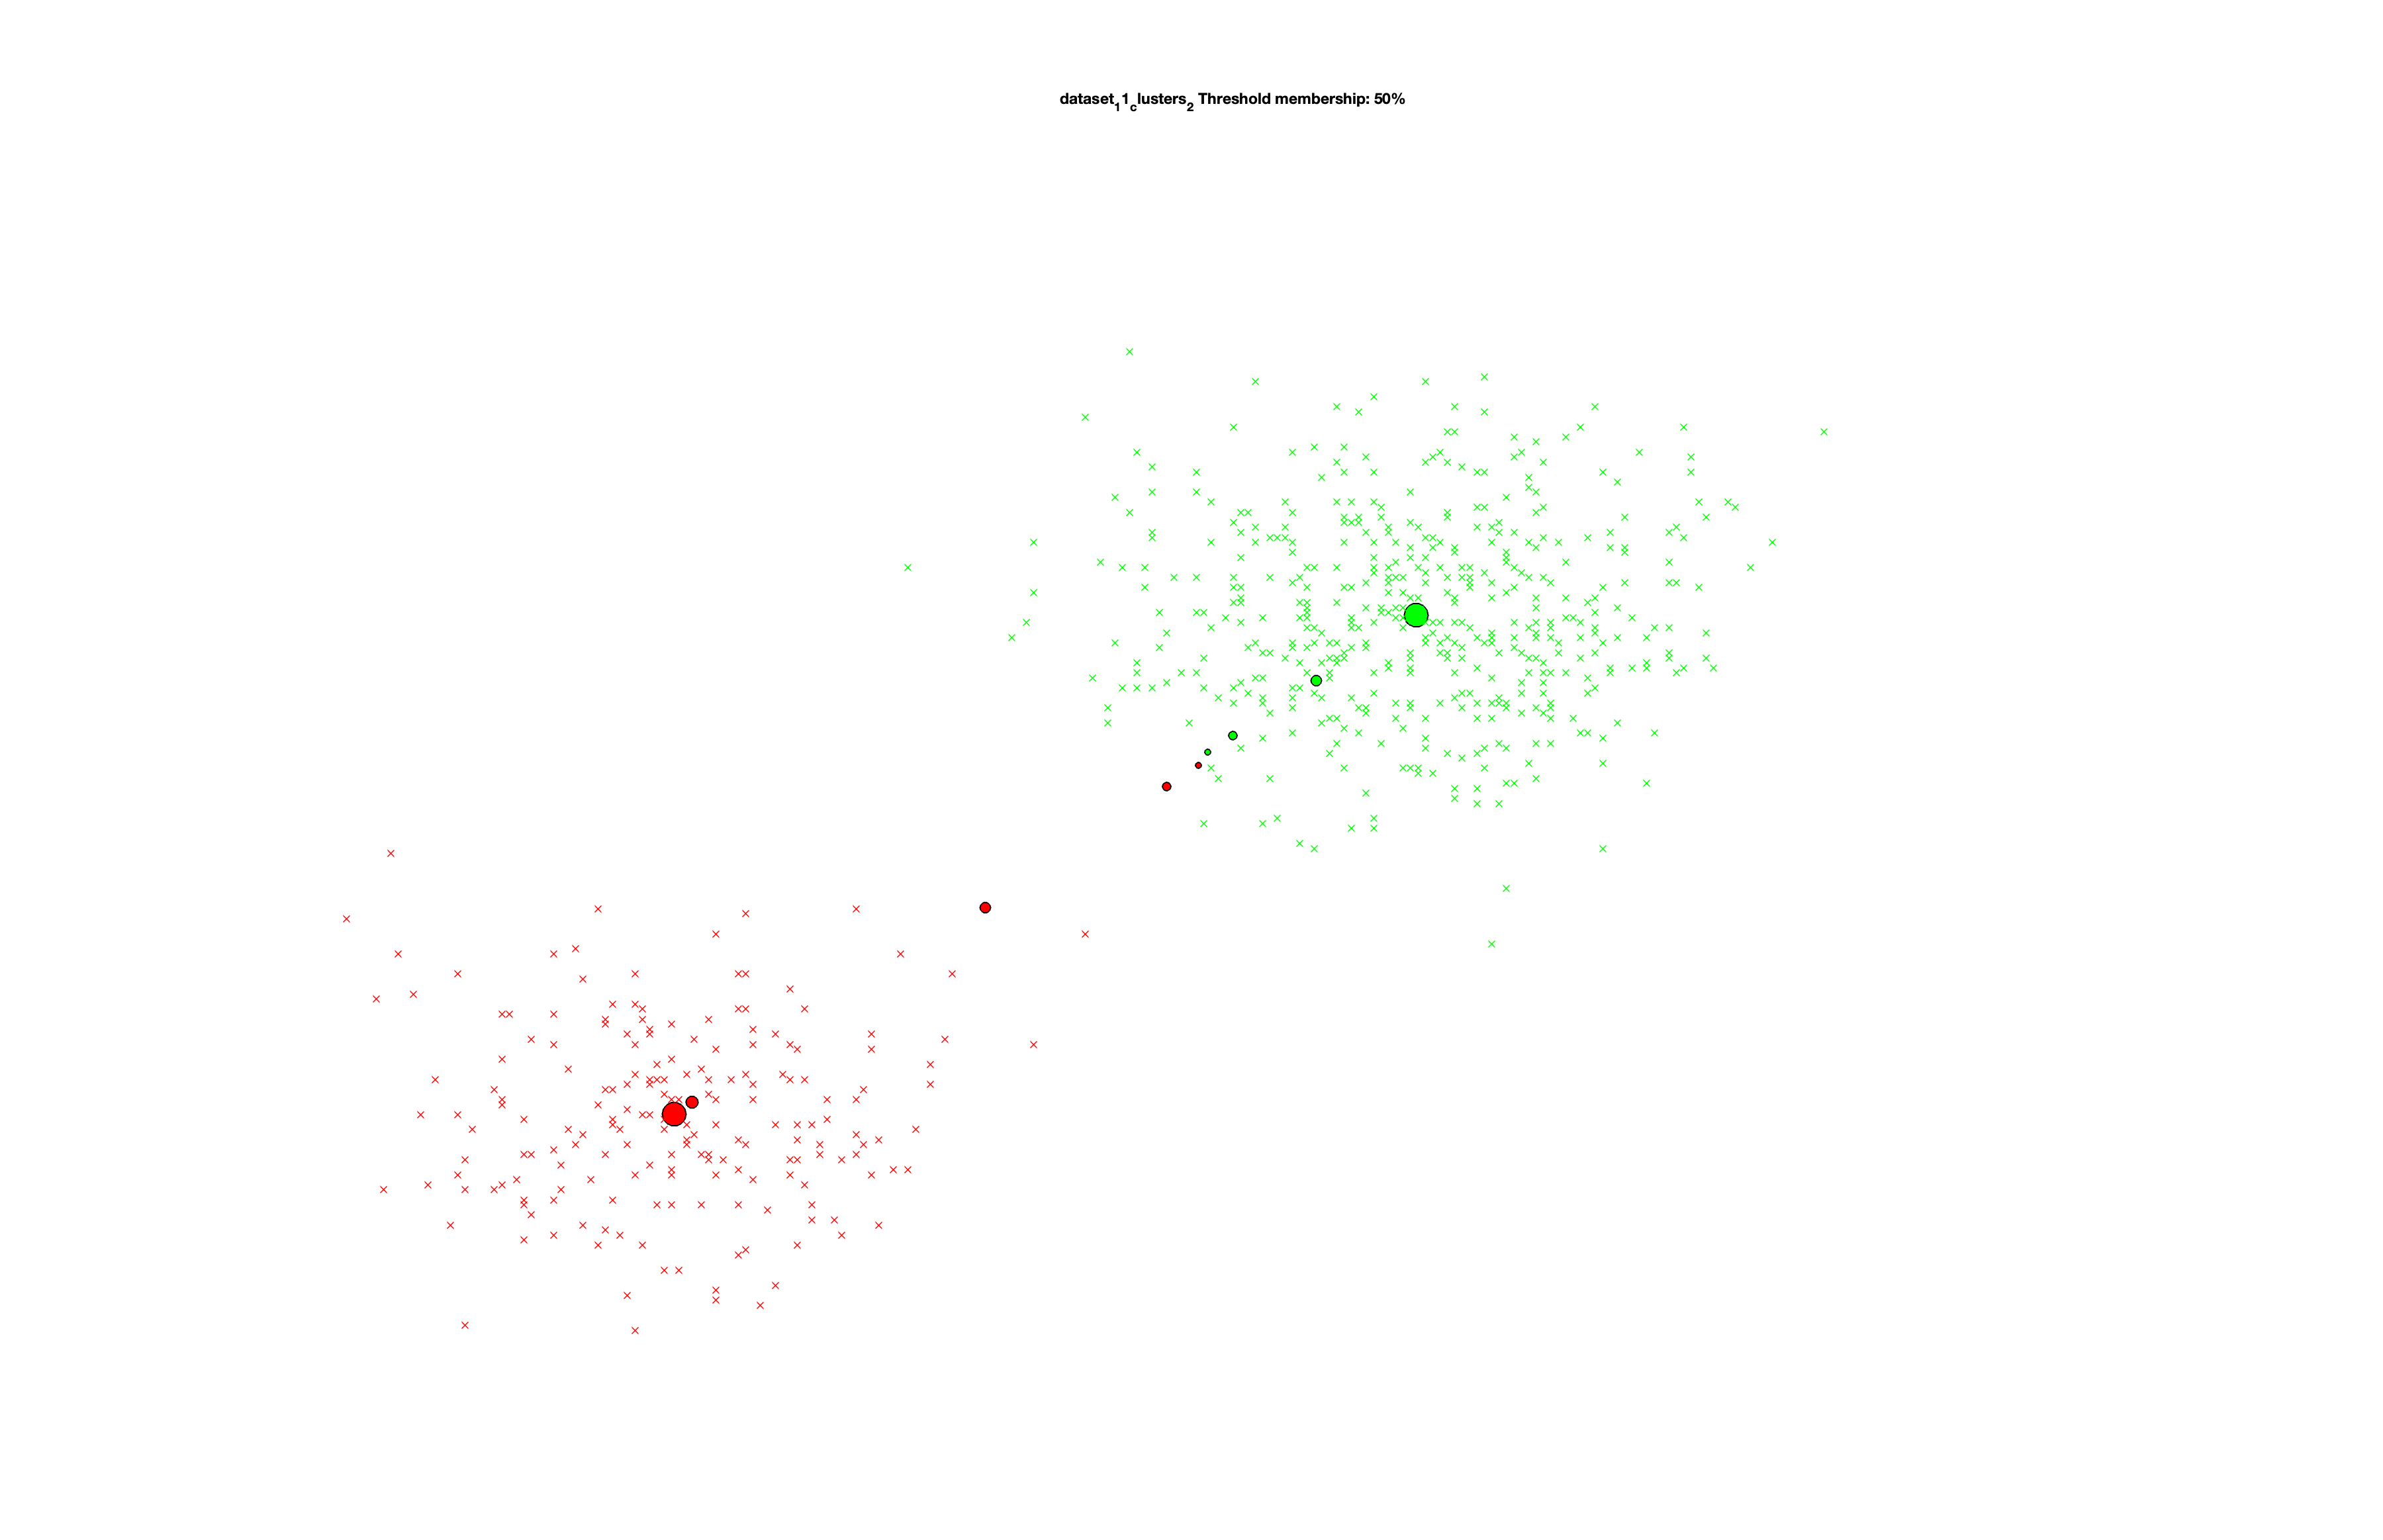

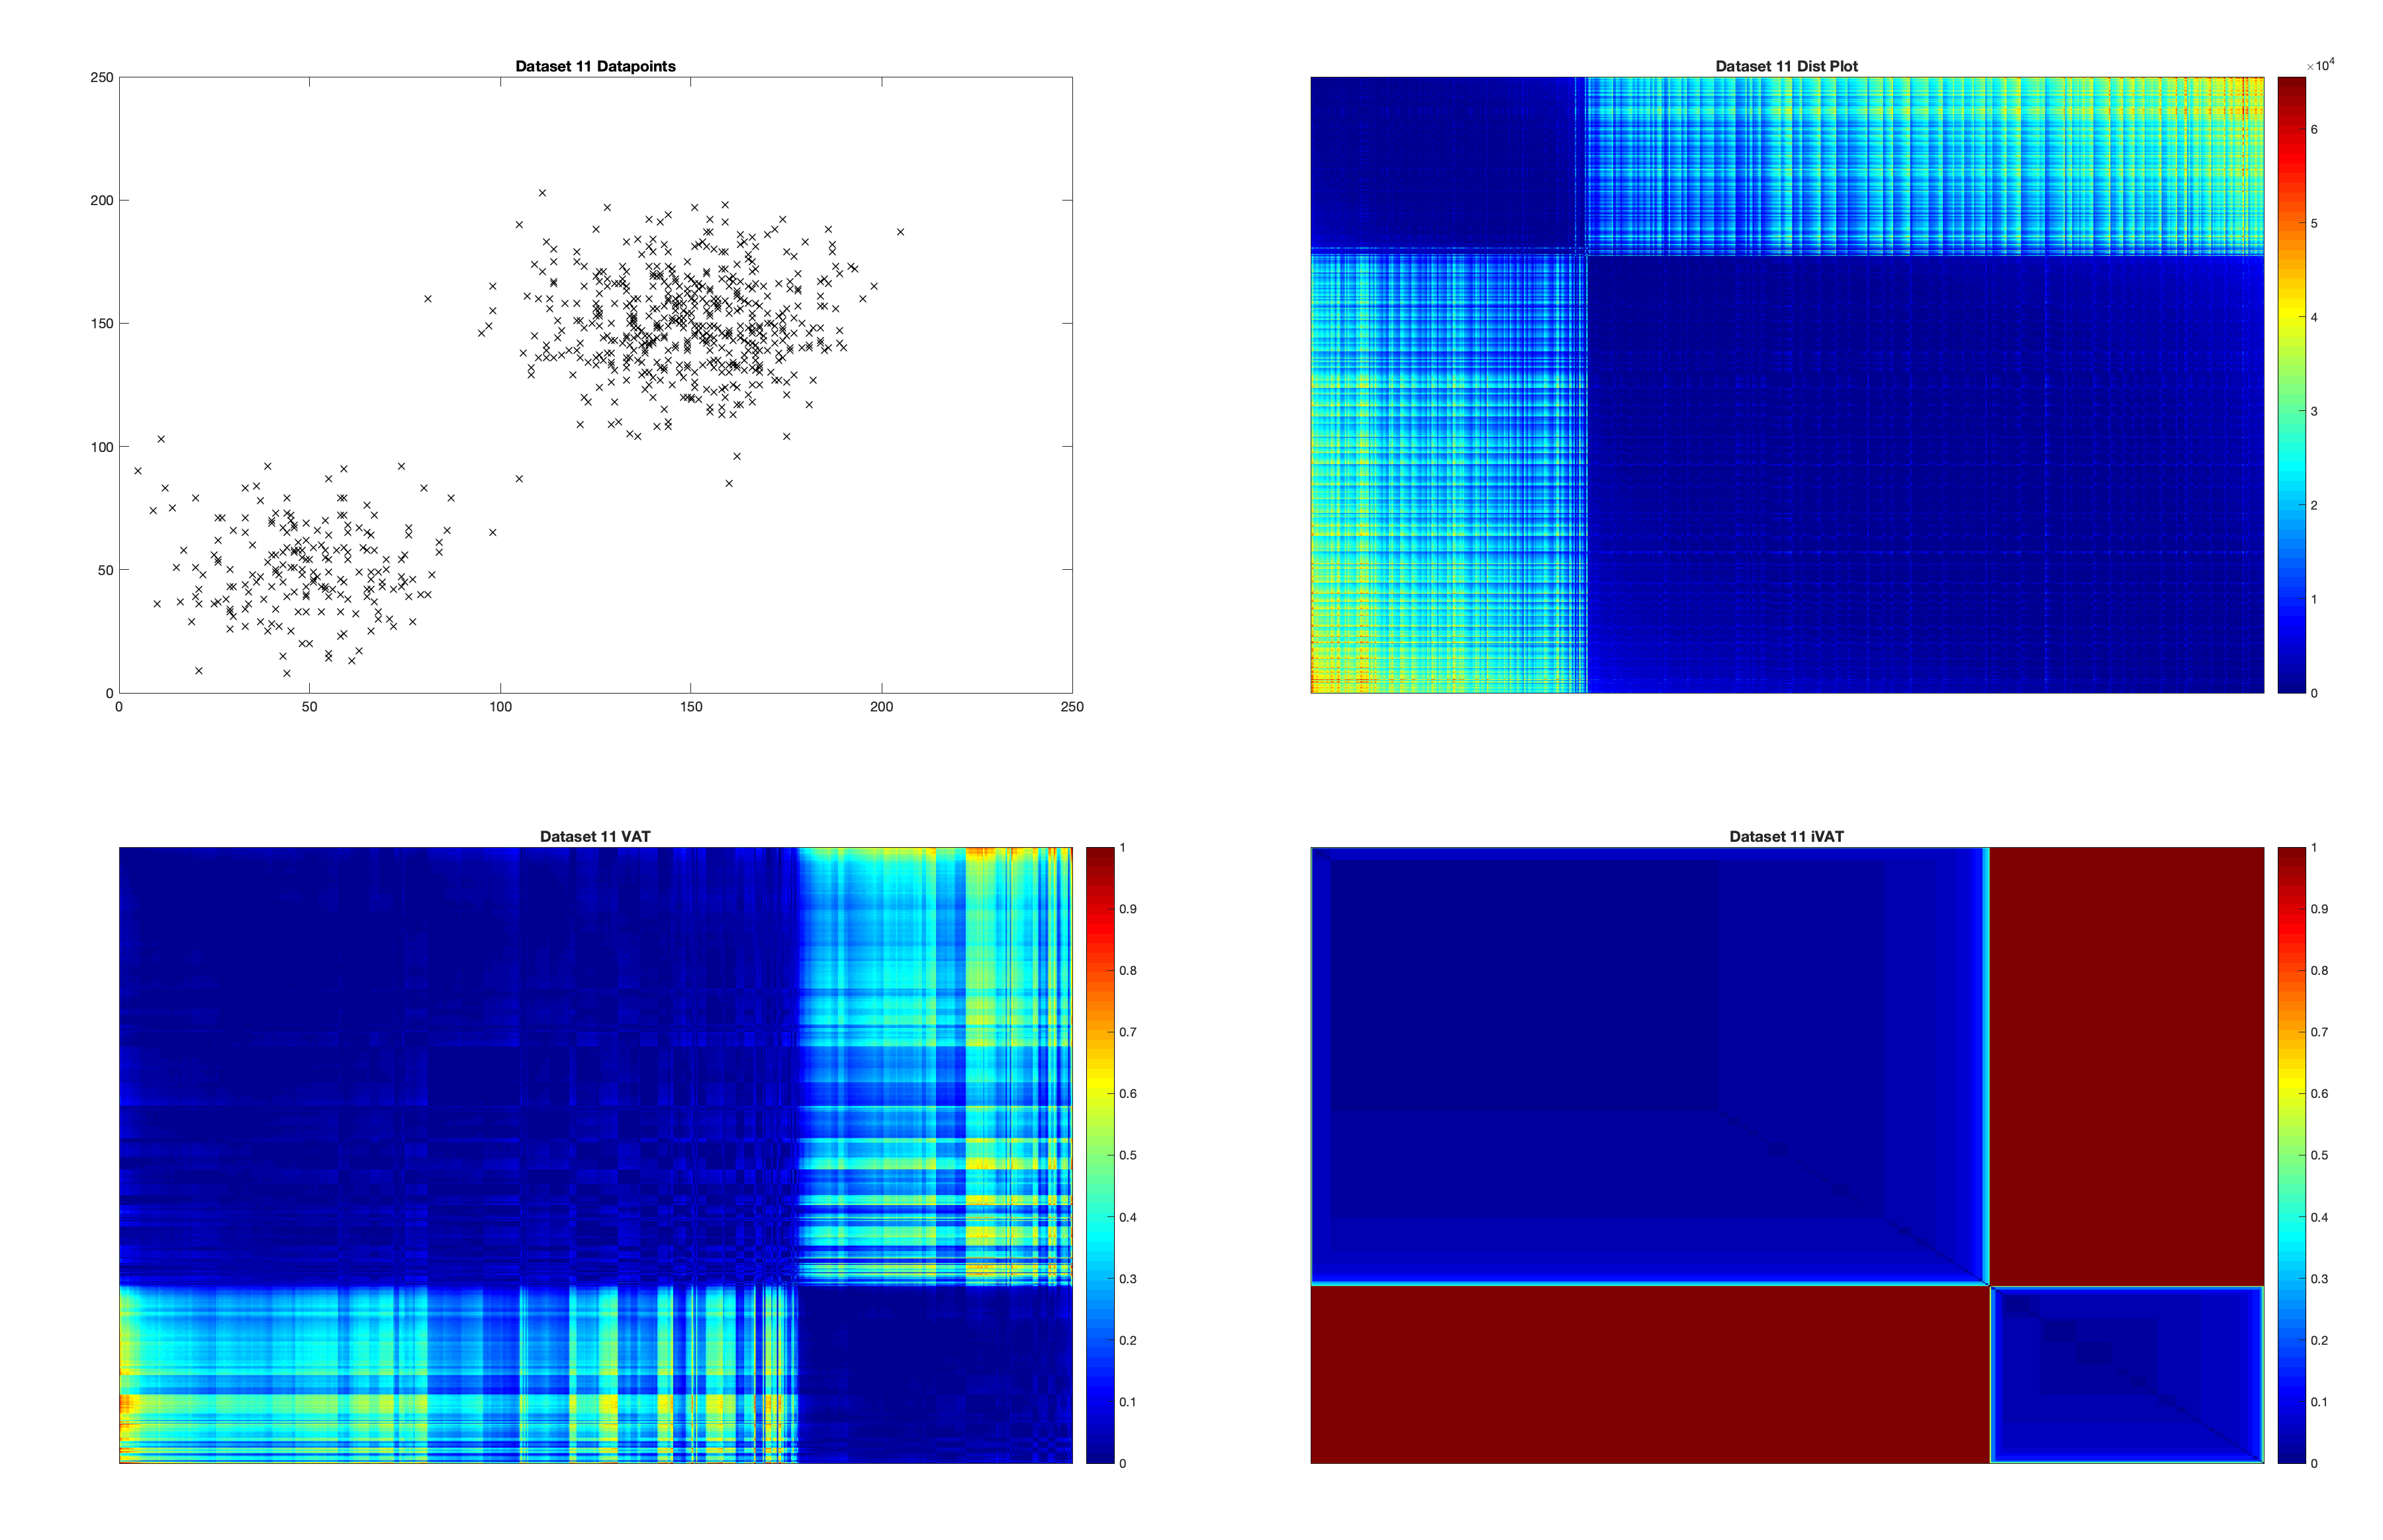

In [14]:
display(Image(filename='../week5/dataset_11_clusters_2_threshold_50.png'))
display(Image(filename='../week4/dataset_11_results.png'))


### _Conclusion_

Looking at the results above, we can see that the methods are capable of drawing accurate results given the data. I do however believe that there was an error in my code. I prefer to write the code from scratch to have a better understanding of the algorithms we use, and I'll run back through it at a later date and look for error (any feedback here would be appreciated). Although not perfect, this exercise does indicate the validity of using post-clustering techniques to verify results. Ironically though, I had to re-run the assignment 5 code for all 9 cluster numbers just to get the values needed for the post-clustering algorithms. If you are looking at a simple dataset or an easily separable dataset after LDA, iVAT alone is likely a solid choice for picking the correct number of clusters. It already resembles the numerator of the CS index to some degree, and LDA has already taken into account separability via the between cluster and within cluster scatters.

With this in mind, I believe that the best number of clusters for datasets 1-12 are: [4, 5, 0, 0, 3, 3, 2, 2, 2, 2, 2, 2] based on the results from Assignment 4.
